In [292]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### Dataset

In [293]:
X = [[27],
    [35],
    [39],
    [21],
    [22],
    [45],
    [102],
    [110],
    [120]]

y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange','pomelo', 'pomelo', 'pomelo']
y = [0, 1, 1, 0, 0, 1, 2, 2, 2]

In [294]:
data = list(zip(X, y_names, y))
data

[([27], 'lemon', 0),
 ([35], 'orange', 1),
 ([39], 'orange', 1),
 ([21], 'lemon', 0),
 ([22], 'lemon', 0),
 ([45], 'orange', 1),
 ([102], 'pomelo', 2),
 ([110], 'pomelo', 2),
 ([120], 'pomelo', 2)]

In [295]:
df = pd.DataFrame(data)
df

,0,1,2
0,[27],lemon,0
1,[35],orange,1
2,[39],orange,1
3,[21],lemon,0
4,[22],lemon,0
5,[45],orange,1
6,[102],pomelo,2
7,[110],pomelo,2
8,[120],pomelo,2


In [296]:
cols = ['size', 'name', 'y']
df = pd.DataFrame(data, columns=cols)
df

,size,name,y
0,[27],lemon,0
1,[35],orange,1
2,[39],orange,1
3,[21],lemon,0
4,[22],lemon,0
5,[45],orange,1
6,[102],pomelo,2
7,[110],pomelo,2
8,[120],pomelo,2


In [297]:
type(X)

list

In [298]:
X = np.array(X)
X = X.reshape(-1,1)
X

array([[ 27],
       [ 35],
       [ 39],
       [ 21],
       [ 22],
       [ 45],
       [102],
       [110],
       [120]])

### Data Visualization

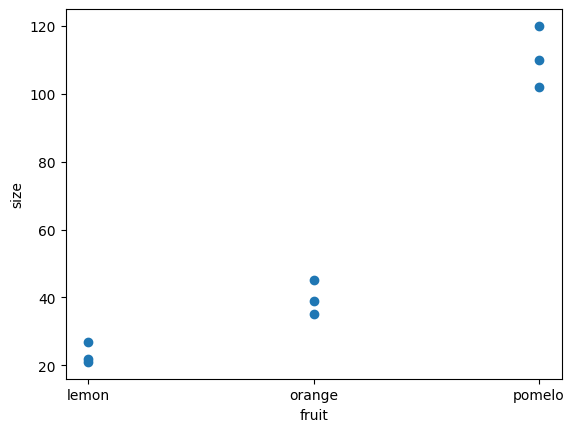

In [299]:
plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names, X)
plt.show()

### Train and Model

In [300]:
from sklearn.tree import DecisionTreeClassifier

In [301]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [302]:
data_input = [102]
data_input = np.array(data_input)
data_input = data_input.reshape(-1,1)
data_input

array([[102]])

In [303]:
y_predict = model.predict(data_input)
y_predict

array([2])

In [304]:
# แสดงหลายๆ input
data_input = [28, 32, 39, 101]
data_input = np.array(data_input)
data_input = data_input.reshape(-1,1)
data_input

array([[ 28],
       [ 32],
       [ 39],
       [101]])

In [305]:
y_predict = model.predict(data_input)
y_predict

array([0, 1, 1, 2])

In [306]:
for i, y in enumerate(y_predict):
    print(f"{data_input[i]}, {y}")

[28], 0
[32], 1
[39], 1
[101], 2


In [307]:
fruit_classes = ['Lemon', 'Orange', 'pomelo']

In [308]:
# แสดงชื่อผลไม้
for i, y in enumerate(y_predict):
    print(f"{data_input[i]}, {fruit_classes[y]}")

[28], Lemon
[32], Orange
[39], Orange
[101], pomelo


### Visualize Model

Tree

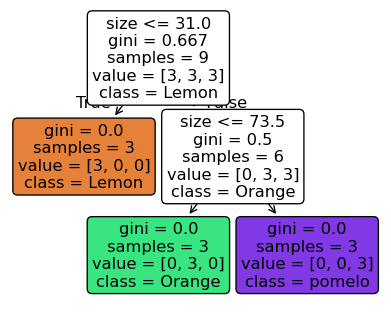

In [309]:
from sklearn.tree import plot_tree

data_feature_names = ['size']

plt.subplots(nrows=1, figsize=(5, 4), dpi=96)

plot_tree(model,
            filled=True, rounded=True,
            feature_names=data_feature_names,
            class_names=fruit_classes)

plt.show()

In [310]:
X_input_size = 72.4
if (X_input_size <= 31):
    fruit = 'Lemon'
elif (X_input_size <= 73.5):
    fruit = 'Orange'
else:
    fruit = 'Pomelo'

print(fruit)

Orange


### Decision regions

In [311]:
from mlxtend.plotting import plot_decision_regions

In [312]:
X = [[27],
    [35],
    [39],
    [21],
    [22],
    [45],
    [102],
    [110],
    [120]]

y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange','pomelo', 'pomelo', 'pomelo']
y = [0, 1, 1, 0, 0, 1, 2, 2, 2]

In [313]:
X = np.array(X)
y = np.array(y)

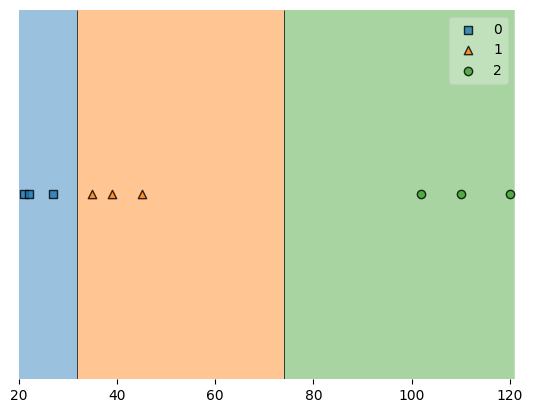

In [314]:
plot_decision_regions(X, y, clf=model)
plt.show()

### Classification 2 classes (2 Features - Fruit 2 classes)

In [315]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Datset

In [316]:
df = pd.read_csv('data/fruit2class.csv')
df

,m,d,target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0
5,8.0,3.1,0
6,8.2,4.4,1
7,7.0,4.8,1
8,7.5,3.8,1
9,7.4,5.1,1


### Data Visualization

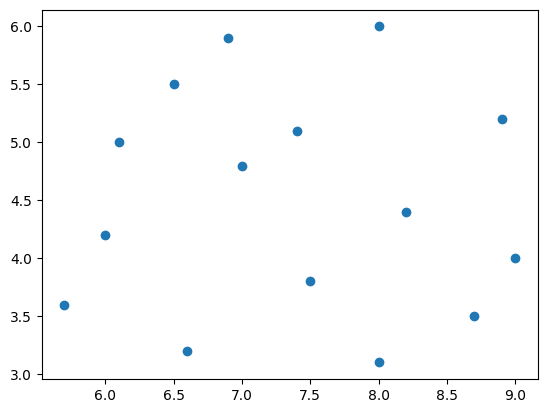

In [317]:
plt.scatter(df.m, df.d)
plt.show()

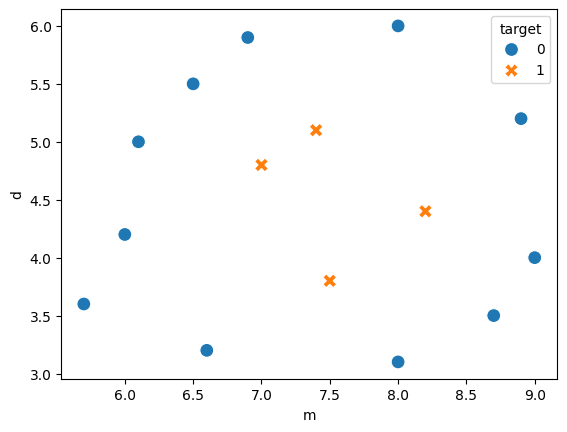

In [318]:
sns.scatterplot(data=df, x='m', y='d', hue='target',
                style='target',s=100)
plt.show()

### Model

In [319]:
X = df.drop(['target'], axis=1) #axis = 1 คือ แนวคอลัมน์
X.head()

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9


In [320]:
y = df.target
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
Name: target, dtype: int64

In [321]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [322]:
model.fit(X, y)

DecisionTreeClassifier()

### Predict

In [323]:
X_input = [[5.6, 3.5]]

y_predict = model.predict(X_input)
y_predict

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [324]:
fruit_classes = ['Grape', 'Lemon']

In [325]:
prd = fruit_classes[y_predict[0]]
print('Result: {}'. format(prd))

Result: Grape


In [326]:
X_input = [[5.6, 4.2],
            [7.6, 4.5]]

y_predict = model.predict(X_input)
y_predict

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1])

In [327]:
print('Result')
for i in y_predict:
    print(fruit_classes[i])

Result
Grape
Lemon


In [328]:
for i, val in enumerate(y_predict):
    print(f'{X_input[i]} = {val} {fruit_classes[val]}')

[5.6, 4.2] = 0 Grape
[7.6, 4.5] = 1 Lemon


### Visualize Model
    - Tree
    - ขอบเขตการแบ่ง (การตัดสินใจ)

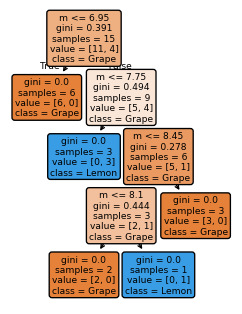

In [342]:
from sklearn.tree import plot_tree 

data_feature_names = ['m', 'd']

plt.subplots(nrows=1, ncols=1, figsize=(3, 4), dpi=96)

plot_tree(model,
            filled=True, rounded=True,
            feature_names=data_feature_names,
            class_names=fruit_classes,)
plt.show()

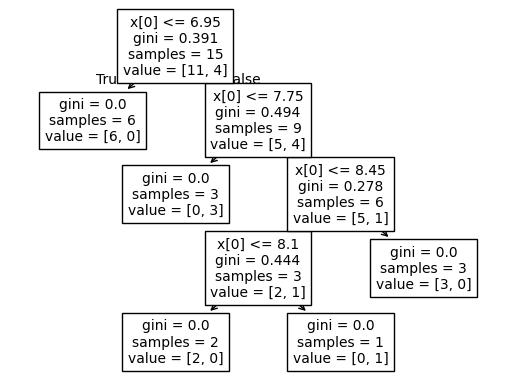

In [343]:
plot_tree(model)
plt.show()

### ขอบเขตของการตัดสินใจ

In [345]:
from mlxtend.plotting import plot_decision_regions

In [346]:
X = np.array(X)
y = np.array(y)

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


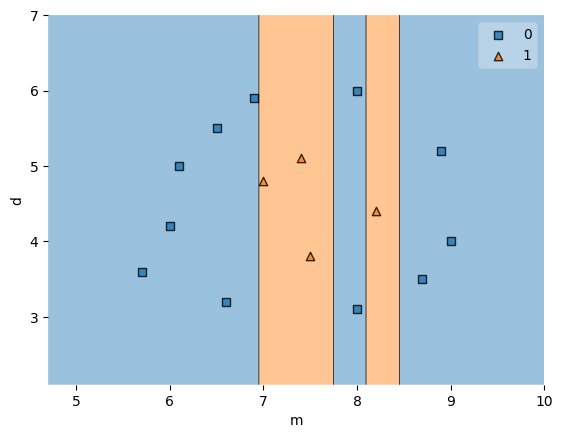

In [347]:
plot_decision_regions(X, y, clf=model)

plt.xlabel('m')
plt.ylabel('d')
plt.show()